<a href="https://colab.research.google.com/github/kuznechek/MIPT-homework/blob/dev/HW_1_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from google.colab import files

uploaded = files.upload()

Saving churn.csv to churn.csv


In [4]:
churn_data = pd.read_csv('./churn.csv')
display(churn_data.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

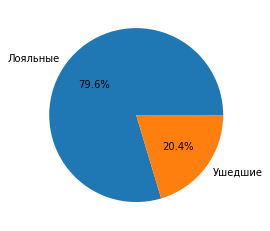

In [5]:
exited = churn_data['Exited'].value_counts()
plt.pie(exited, labels=['Лояльные', 'Ушедшие'], autopct='%.1f%%')
plt.show()

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

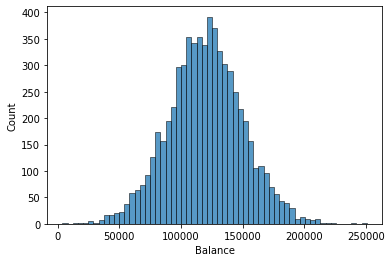

In [6]:
sns.histplot(data = churn_data.query('Balance > 2500'), x='Balance')
plt.show()

На гистограмме представлено распределение баланса пользователей, у которых на счету больше 2500 долларов. Распределение близко к нормальному.

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

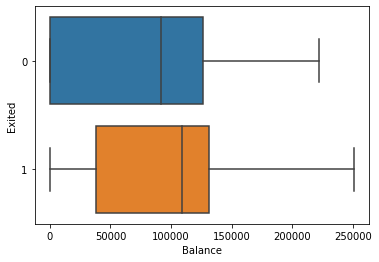

In [9]:
sns.boxplot(data = churn_data, x = 'Balance', y = 'Exited', orient='h')
plt.show()

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

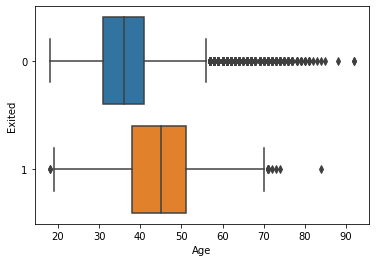

In [12]:
sns.boxplot(data = churn_data, x = 'Age', y = 'Exited', orient='h')
plt.show()

В группе оставшихся клиентов потенциальных выбросов больше. Особое внимание следует уделить категории возраста выше 55-56 лет.

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

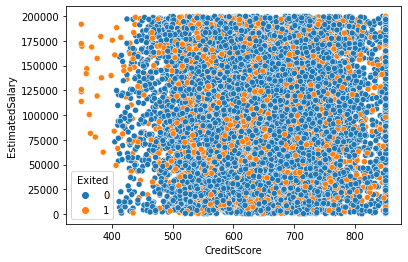

In [13]:
sns.scatterplot(data = churn_data, x = 'CreditScore', y = 'EstimatedSalary', hue = 'Exited'
)
plt.show()

На графике явной взаимосвязи не наблюдается.

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

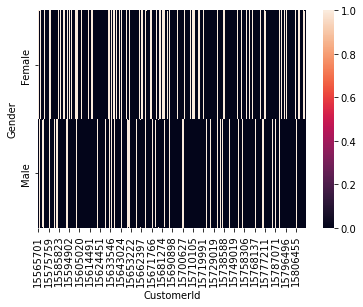

In [20]:
temp_data = churn_data.pivot_table(values = 'Exited', columns='CustomerId', index = 'Gender')
sns.heatmap(data = temp_data)
plt.show()

График показывает, что чаще ряды лояльных клиентов покидают женщины.

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

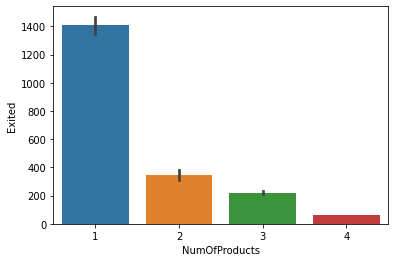

In [17]:
sns.barplot(data = churn_data, x = 'NumOfProducts', y = 'Exited', estimator = sum)
plt.show()

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

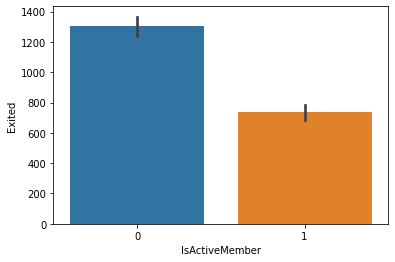

In [18]:
sns.barplot(data=churn_data, x='IsActiveMember', y='Exited', estimator=sum)
plt.show()

График показывает, что статус активного клиента снижает отток клиентов. Для уменьшения оттока банку необходимо сделать бóльшее количество клиентов активными.

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [ ]:
temp_data = (churn_data.groupby(by = 'Geography')['Exited'].sum()).pivot_table(values = 'Exited', columns = 'Geography')

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

In [19]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

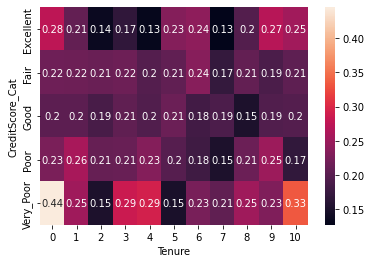

In [22]:
churn_data['CreditScore_Cat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

temp_data = churn_data.pivot_table(values = 'Exited', columns = 'Tenure', index = 'CreditScore_Cat')
sns.heatmap(data = temp_data, annot = True)
plt.show()